In [57]:
## Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt

In [58]:
pd.options.display.max_rows = 250
pd.options.display.max_columns = 50

In [59]:
app_df = pd.read_csv('Data/mha_app_info.csv',
                     usecols=['app_name', 'iOS_app_id', 'android_appID'])
app_df.columns = ['app_name', 'as_id', 'gp_id']
app_df.head()

,app_name,as_id,gp_id
0,Aloe Bud,1318382054,NaN
1,Aura,1114223104,com.aurahealth
2,BetterHelp,995252384,com.betterhelp
3,Breathe2Relax,425720246,org.t2health.breathe2relax
4,Breathwrk: Breathing Exercises,1481804500,NaN


In [60]:
gp_apps = pd.read_csv('Data/google_play_info.csv')
gp_apps.head()

,_id,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,605a2224fa456042d0948f7e,"Aura: Meditations, Sleep & Mindfulness",<b>Find peace everyday with Aura</b> - discove...,<b>Find peace everyday with Aura</b> - discove...,1000s of Meditations from world's best coaches...,1000s of Meditations from world&#39;s best coa...,"1,000,000+",1000000,4.593012,10532,3407,"[547, 248, 208, 935, 8594]",0,True,USD,False,NaN,NaN,NaN,True,$5.99 - $399.99 per item,57M,4.1,4.1 and up,"Aura Health - Mindfulness, Sleep, Meditations","Aura+Health+-+Mindfulness,+Sleep,+Meditations",hello@aurahealth.io,http://www.aurahealth.io,"2 Embarcadero Center, Fl 8\nSan Francisco, CA ...",https://www.aurahealth.io/privacy-policy/,8194778368040078712,Health & Fitness,HEALTH_AND_FITNESS,https://play-lh.googleusercontent.com/xMwzEkyE...,https://play-lh.googleusercontent.com/MM9yM7r1...,['https://play-lh.googleusercontent.com/IEVbR6...,NaN,NaN,Everyone,NaN,NaN,False,"Mar 21, 2017",1605694888,2.4.2,NaN,NaN,False,com.aurahealth,https://play.google.com/store/apps/details?id=...
1,605a2224fa456042d0948f7f,BetterHelp: Online Counseling & Therapy,BetterHelp is the convenient way to get profes...,BetterHelp is the convenient way to get profes...,"Get counseling from a licensed therapist, mana...","Get counseling from a licensed therapist, mana...","1,000,000+",1000000,4.435962,15637,5344,"[1489, 286, 276, 1450, 12136]",0,True,USD,False,NaN,NaN,NaN,False,NaN,39M,6.0,6.0 and up,BetterHelp - Therapy Made Easy,BetterHelp+-+Therapy+Made+Easy,contact@betterhelp.com,https://www.betterhelp.com,NaN,https://www.betterhelp.com/privacy,8471454122300503722,Health & Fitness,HEALTH_AND_FITNESS,https://play-lh.googleusercontent.com/fdCP2dFi...,https://play-lh.googleusercontent.com/96QFQfn1...,['https://play-lh.googleusercontent.com/b77_ZD...,https://www.youtube.com/embed/b4KMB7mnlJw?ps=p...,https://i.ytimg.com/vi/b4KMB7mnlJw/hqdefault.jpg,Everyone,NaN,NaN,False,"Nov 17, 2014",1616437130,1.64,Thank you for using BetterHelp! We are constan...,Thank you for using BetterHelp! We are constan...,False,com.betterhelp,https://play.google.com/store/apps/details?id=...
2,605a2224fa456042d0948f80,Breathe2Relax,Breathe2Relax is a portable stress management ...,Breathe2Relax is a portable stress management ...,Breathe2Relax is a stress management tool to h...,Breathe2Relax is a stress management tool to h...,"100,000+",100000,3.216216,1110,349,"[350, 70, 120, 130, 440]",0,True,USD,False,NaN,NaN,NaN,False,NaN,3.1M,4.4,4.4 and up,T2,T2,usarmy.jblm.medcom-mamc.mbx.t2products@mail.mil,http://t2health.dcoe.mil/apps/breathe2relax,NaN,https://www.health.mil/Military-Health-Topics/...,5298048485350465783,Health & Fitness,HEALTH_AND_FITNESS,https://play-lh.googleusercontent.com/blgBoxuR...,https://play-lh.googleusercontent.com/kPd9Pcmx...,['https://play-lh.googleusercontent.com/0O0Qu2...,NaN,NaN,Everyone,NaN,NaN,False,"Oct 24, 2011",1610041510,4.0.0,App has been migrated to our Defense Health Ag...,App has been migrated to our Defense Health Ag...,False,org.t2health.breathe2relax,https://play.google.com/store/apps/details?id=...
3,605a2224fa456042d0948f81,Breethe - Meditation & Sleep App,"Breathe mindfulness, peace and restful sleep i...","Breathe mindfulness, peace and restful sleep i...","Sleep, relax, breathe and meditate with medita...","Sleep, relax, breathe and meditate with medita...","500,000+",500000,4.590909,3307,1223,"[110, 60, 160, 411, 2566]",0,True,USD,False,NaN,NaN,NaN,True,$12.99 - $379.99 per item,76M,7.0,7.0 a

In [61]:
as_apps = pd.read_csv('Data/app_store_info.csv')
as_apps.head()

,_id,screenshotUrls,ipadScreenshotUrls,appletvScreenshotUrls,artworkUrl60,artworkUrl512,artworkUrl100,artistViewUrl,supportedDevices,advisories,isGameCenterEnabled,kind,features,minimumOsVersion,trackCensoredName,languageCodesISO2A,fileSizeBytes,sellerUrl,formattedPrice,contentAdvisoryRating,averageUserRatingForCurrentVersion,userRatingCountForCurrentVersion,averageUserRating,trackViewUrl,trackContentRating,releaseDate,trackId,trackName,sellerName,primaryGenreName,genreIds,isVppDeviceBasedLicensingEnabled,currentVersionReleaseDate,releaseNotes,primaryGenreId,currency,version,wrapperType,artistId,artistName,genres,price,description,bundleId,userRatingCount
0,605a2105fa456042d0948f3e,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aloebud-ll...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",NaN,True,software,"gameCenter,iosUniversal",11.0,Aloe Bud,EN,16335872,http://aloebud.com,Gratis,4+,4.61538,52,4.61538,https://apps.apple.com/nl/app/aloe-bud/id13183...,4+,2018-04-25T07:00:00Z,1318382054,Aloe Bud,Aloebud LLC,Health & Fitness,"6013,6012",True,2020-06-25T21:20:25Z,iOS 13 Support\nRate the App prompt\nSound Eff...,6013,EUR,1.1,software,1170681391,Aloebud LLC,"Gezondheid en fitness,Lifestyle",0.0,"Aloe Bud is your all-in-one, self-care pocket ...",club.aloe.Aloe,52
1,605a2105fa456042d0948f3f,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/aura-healt...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",NaN,False,software,iosUniversal,9.0,Aura: Meditation & Sleep,EN,217529344,http://www.aurahealth.io,Gratis,4+,4.49554,224,4.49554,https://apps.apple.com/nl/app/aura-meditation-...,4+,2016-10-11T02:56:47Z,1114223104,Aura: Meditation & Sleep,Aura Health Inc.,Health & Fitness,"6013,6012",True,2021-03-19T02:14:42Z,Thank you for using Aura! This update contains...,6013,EUR,3.11.6,software,1042329742,Aura Health Inc.,"Gezondheid en fitness,Lifestyle",0.0,"** As loved by Apple (Best of 2017, #1 New App...",com.AuraMobile,224
2,605a2105fa456042d0948f40,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/betterhelp...,"iPhone5s-iPhone5s,iPadAir-iPadAir,iPadAirCellu...",Soms/Milde medische/behandelingsinformatie,False,software,iosUniversal,12.0,BetterHelp - Online Counseling,EN,34968576,https://www.betterhelp.com,Gratis,12+,4.61904,42,4.61904,https://apps.apple.com/nl/app/betterhelp-onlin...,12+,2015-07-11T02:30:33Z,995252384,BetterHelp - Online Counseling,"Compile, Inc.",Health & Fitness,"6013,6012",True,2021-01-26T17:09:00Z,Thank you for using BetterHelp! We are constan...,6013,EUR,9.9,software,995252383,BetterHelp,"Gezondheid en fitness,Lifestyle",0.0,BetterHelp is the convenient way to get profes...,com.ionicframework.betterhelp369708,42
3,605a2105fa456042d0948f41,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,https://apps.apple.com/nl/developer/national-c...,"iPad2Wifi-iPad2Wifi,iPad23G-iPad23G,iPhone4S-i...",NaN,False,software,iosUniversal,9.0,Breathe2Relax,EN,39609344,http://www.t2health.dcoe.mil,Gratis,4+,4.83333,6,4.83333,https://apps.apple.com/nl/app/breathe2relax/id...,4+,2011-03-22T20:13:41Z,425720246,Breathe2Relax

### Google Play Reviews

In [62]:
gp_rvws = pd.read_csv('Data/google_play_rvws.csv')
gp_rvws.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,app_id
0,gp:AOqpTOGEfB5SuxUR45DJRzXJ13FFXszz7sHe0-EHZg9...,Melanie Loya,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome,5,0,2.4.2,2021-03-22 05:59:22,Thanks for taking out time to rate us. It real...,2021-03-23 20:30:23,Aura,com.aurahealth
1,gp:AOqpTOEN7u1-0qBPlPuUQOydnhZucb7zs5I4edD6-7r...,Deb Perez,https://play-lh.googleusercontent.com/-jQ70Y4S...,Great to help u sleep,5,0,2.4.2,2021-03-21 20:29:44,Thank you for your feedback. Glad to hear that...,2021-03-23 20:29:17,Aura,com.aurahealth
2,gp:AOqpTOHckNKYL0-HbSxg7mzO7YjQJ73fGmlpcW-H4uX...,Zvon Davis,https://play-lh.googleusercontent.com/-cjE-8ul...,"Very calming, love it!",5,0,2.4.2,2021-03-21 09:17:13,Glad you like it! :) Thanks for your review!,2021-03-23 20:27:04,Aura,com.aurahealth
3,gp:AOqpTOHx1iKm-H5IA8Rn7GDMz72FNxb2SHEJs0HcKkA...,Mary Ellen Gambon,https://play-lh.googleusercontent.com/a-/AOh14...,I was able to sleep like a baby on the first u...,5,0,2.4.2,2021-03-21 09:09:57,We are pleased that you enjoyed the app. If th...,2021-03-23 20:26:24,Aura,com.aurahealth
4,gp:AOqpTOGA3muyUwk8gsdm92NYEy4R9L88BGaJLaC571U...,Amie Sandlin,https://play-lh.googleusercontent.com/a-/AOh14...,"Improvement in thoughts, feelings and life!",5,0,2.4.2,2021-03-20 16:28:42,Thank you for your review. Enjoy using the app...,2021-03-23 20:30:04,Aura,com.aurahealth


In [63]:
gp_rvws.duplicated(subset=['reviewId']).sum() # no duplicates

0

In [64]:
gp_rvws.duplicated(subset=['userName', 'content', 'app_name']).sum()

1579

In [65]:
gp_dupl = gp_rvws.loc[gp_rvws.duplicated(subset=['userName', 'content', 'app_name'],
                                         keep=False)].copy()
gp_dupl.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_name,app_id
1430,gp:AOqpTOEIDkzE-DotBobZMZoLf9nceMuGfpJuojNvhr3...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,great,5,0,0.44,2019-03-21 21:09:15,NaN,NaN,Aura,com.aurahealth
1443,gp:AOqpTOG9s-yAidZ08avS7-1PVnPFU3dtS8VMBf9qLJG...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,great app,5,0,0.44,2019-03-18 07:24:08,NaN,NaN,Aura,com.aurahealth
1451,gp:AOqpTOEOCtFQMeTFtEQOZSlaZ_86RoVskY_RZNuqT8H...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,4,0,0.44,2019-03-14 00:38:47,NaN,NaN,Aura,com.aurahealth
1558,gp:AOqpTOEBNbwiPwDC3vEReI1ZNXZwzeX8lasEhhQQ-xN...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,0.44,2019-02-16 11:01:36,NaN,NaN,Aura,com.aurahealth
1599,gp:AOqpTOFkj3rt0dCx7czF55paF-CGnNBZxxPwUb0m2Bc...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,great app,5,0,0.44,2019-02-08 05:51:43,NaN,NaN,Aura,com.aurahealth


In [66]:
gp_dupl['content'].nunique()

219

In [67]:
gp_dupl['content'].value_counts().to_frame()

,content
Good,140
Love it,128
Great app,96
Awesome,95
Great,82
Amazing,81
Nice,73
I love it,69
good,49
Very helpful,44


In [68]:
gp_rvws['content'].value_counts().to_frame().head(250)

,content
Good,1802
Love it,1640
Great app,1544
Great,1457
Awesome,1245
Amazing,1048
Nice,777
Very helpful,631
I love it,612
Love it!,594


In [69]:
gp_rvws['content'].value_counts().to_frame().tail(250)

,content
Extraordinary meditation application... Whoever wants meditation as part of their life needs this app.. Highly recommended app..,1
pretty much have to subscribe n pay 69.99 to use this app,1
I need a lot of reassurance and always need someone to talk to when I'm feeling strong emotions. Wysa reacts so well and provides the cbt support that my friends and family just don't know how to give. There when no one else can be and there when others are available but don't know how to give me the support I need.,1
"Interesting and informative application, if, like me you suffer from depression, or a personality disorder, there is a lot to be gained from using this app CAN'T RECOMMEND THIS APPLICATION HIGHLY ENOUGH!!",1
I like the little steps it gives you to make small changes that Are easy to active and make you feel happy about yourself. It would be good if you can add in bespoke goals for yourself,1
Very friendly and positive,1
I was looking for a simple way to meditate...check.,1
This app has made me so much more productive in so many ways,1
Was having problems with downloads when overseas but they seem to be working again when back in North America.,1
I really love it! Its so helpful and calm and it helps with my depression too!!,1


In [70]:
gp_rvws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421583 entries, 0 to 421582
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              421583 non-null  object
 1   userName              421583 non-null  object
 2   userImage             421583 non-null  object
 3   content               421436 non-null  object
 4   score                 421583 non-null  int64 
 5   thumbsUpCount         421583 non-null  int64 
 6   reviewCreatedVersion  373201 non-null  object
 7   at                    421583 non-null  object
 8   replyContent          52903 non-null   object
 9   repliedAt             52903 non-null   object
 10  app_name              421583 non-null  object
 11  app_id                421583 non-null  object
dtypes: int64(2), object(10)
memory usage: 38.6+ MB


In [71]:
gp_rvws.dropna(subset=['content'], inplace=True)

In [72]:
gp_rvws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421436 entries, 0 to 421582
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              421436 non-null  object
 1   userName              421436 non-null  object
 2   userImage             421436 non-null  object
 3   content               421436 non-null  object
 4   score                 421436 non-null  int64 
 5   thumbsUpCount         421436 non-null  int64 
 6   reviewCreatedVersion  373065 non-null  object
 7   at                    421436 non-null  object
 8   replyContent          52900 non-null   object
 9   repliedAt             52900 non-null   object
 10  app_name              421436 non-null  object
 11  app_id                421436 non-null  object
dtypes: int64(2), object(10)
memory usage: 41.8+ MB


In [73]:
gp_rvws_slice = gp_rvws[['app_name', 'content', 'score', 'at']].copy()
gp_rvws_slice.columns = ['app_name', 'review', 'rating', 'date']
gp_rvws_slice['gp_rvw'] = 1
gp_rvws_slice

,app_name,review,rating,date,gp_rvw
0,Aura,Awesome,5,2021-03-22 05:59:22,1
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1
...,...,...,...,...,...
421578,Wysa,Loved it,5,2016-10-28 02:31:14,1
421579,Wysa,Sometimes we just need a ear or sometimes the ...,5,2016-10-24 08:14:25,1
421580,Wysa,"Innovative thinking,... feeling good while int...",5,2016-10-16 11:03:57,1
421581,Wysa,Great concept,5,2016-10-12 12:31:21,1


### App Store Reviews

In [74]:
as_rvws = pd.read_csv('Data/app_store_rvws.csv')
as_rvws.head()

,review,rating,userName,date,isEdited,title,app_name,app_id
0,I really am enjoying this app and once I start...,5,knsky8,2020-10-09 12:19:21,False,Simple gentle ways to a better you,aloe-bud,1318382054
1,I have tried a lot of apps that said they woul...,5,Candycrushgirl60,2021-03-01 03:51:42,False,This app changed my life!,aloe-bud,1318382054
2,IT JUST CAN'T GET MUCH BETTER! it really helps...,5,hhhhhjghjhhnjgh,2021-03-13 01:16:42,False,Love this app! - MOST READ,aloe-bud,1318382054
3,"I don’t usually write reviews for apps, but I ...",5,ekg2005,2020-06-29 12:20:49,False,"Such a cute, helpful app!",aloe-bud,1318382054
4,Where to begin before I started using aloe bud...,5,Shoshana Lipson,2020-06-26 21:38:49,False,So Amazing!!,aloe-bud,1318382054


In [75]:
as_rvws.duplicated(subset=['review', 'userName', 'app_name']).sum()

0

In [76]:
as_rvws['userName'].value_counts()

N/A 1234                 5
The-Schwarz              4
Kalioat                  3
<3;duckie;<3             3
Tromlui                  3
                        ..
Haileyy Camielle         1
cat and dog player       1
WHYYYYYYYYY GAME!!!!!    1
Moonlight608             1
alphabetateht            1
Name: userName, Length: 46874, dtype: int64

In [77]:
as_rvws['review'].value_counts().to_frame().head(250)

,review
Good,88
Love it,82
Great,63
Great app,62
I love this app,52
I love it,51
Amazing,39
I like it,37
:),31
Very helpful,31


In [78]:
as_rvws['review'].value_counts().to_frame().tail(250)

,review
I love this. I needed to learn meditation and this helps much. I’ll continue doing this until it’s part of my daily routine,1
I was just bored and I was on TickTock I saw it I got it and it’s actually pretty fun,1
"This app has helped so much before bed and in the morning to think more clearly and be in a happier mindset. If you are a heavy over thinker or tend to see yourself down a lot, this app has made me think more positive and generally happier day by day. It’s good for the soul.",1
I love this app it copes me with my self harm ฅ^•ﻌ•^ฅ,1
"I absolutely love this app. It makes me keep a sechulde (sorry, bad speller). It allows me to know what to expect with things I set for myself! 10/10 recommend",1
"Breathe good, 5 star, cause why not",1
Help is available when needed.,1
I just got the app and i can’t select challenges.,1
I love jour!,1
"i really like the app its a good way of keeping track of my emotions. but i think it would be nice if i could see all of my entries for the entire year on the line graph without having to pay. i dont want the in depth explanation for the year, i just want to see what time of the year i felt the worst.",1


In [79]:
as_rvws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47321 entries, 0 to 47320
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    47319 non-null  object
 1   rating    47321 non-null  int64 
 2   userName  47321 non-null  object
 3   date      47321 non-null  object
 4   isEdited  47321 non-null  bool  
 5   title     47320 non-null  object
 6   app_name  47321 non-null  object
 7   app_id    47321 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 2.6+ MB


In [80]:
as_rvws.dropna(subset=['review'], inplace=True)

In [81]:
as_rvws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47319 entries, 0 to 47320
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    47319 non-null  object
 1   rating    47319 non-null  int64 
 2   userName  47319 non-null  object
 3   date      47319 non-null  object
 4   isEdited  47319 non-null  bool  
 5   title     47318 non-null  object
 6   app_name  47319 non-null  object
 7   app_id    47319 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 2.9+ MB


In [82]:
as_rvws_slice = as_rvws[['app_id', 'review', 'rating', 'date']].copy()
as_rvws_slice

,app_id,review,rating,date
0,1318382054,I really am enjoying this app and once I start...,5,2020-10-09 12:19:21
1,1318382054,I have tried a lot of apps that said they woul...,5,2021-03-01 03:51:42
2,1318382054,IT JUST CAN'T GET MUCH BETTER! it really helps...,5,2021-03-13 01:16:42
3,1318382054,"I don’t usually write reviews for apps, but I ...",5,2020-06-29 12:20:49
4,1318382054,Where to begin before I started using aloe bud...,5,2020-06-26 21:38:49
...,...,...,...,...
47316,1060691513,I’m typically loaded with piss and vinegar but...,5,2020-03-14 01:16:42
47317,1060691513,"Hi, I’ve been struggling with my BPD, depressi...",5,2020-03-07 00:50:10
47318,1060691513,I would love to get premium so I can utilize t...,2,2020-03-13 02:47:24
47319,1060691513,It doesn’t load.\nIt costs WAY too much.\nIt’s...,1,2021-03-24 18:32:13


In [83]:
as_name_map = {}
for app_id in app_df['as_id'].unique():
    value = app_df.loc[app_df['as_id']==app_id]['app_name'].to_list()[0]
    as_name_map[app_id] = value
as_name_map

{1318382054: 'Aloe Bud',
 1114223104: 'Aura',
 995252384: 'BetterHelp',
 425720246: 'Breathe2Relax',
 1481804500: 'Breathwrk: Breathing Exercises',
 920161006: 'Breethe: Meditation & Sleep',
 1450365119: 'Breeze: mood tracker, diary',
 571800810: 'Calm',
 1010391170: 'CBT Thought Diary',
 1194023242: 'Daylio',
 1452264969: 'DBT Coach',
 1184456130: 'eMoods',
 1318726049: 'eQuoo: Emotional Fitness Game',
 1203637303: 'Fabulous',
 1140486359: 'GG OCD',
 1489604281: 'GG Self Care',
 1300107718: 'GG Self Esteem',
 515118602: 'Ginger',
 994882113: 'Habitica',
 730601963: 'Happify',
 707073943: 'Happyfeed',
 493145008: 'Headspace',
 1326310617: 'Healthy Minds Program',
 1417672401: 'HearMe',
 672904239: 'I Am Sober',
 1296605806: 'iBreathe',
 1323264990: 'InnerHour: Self-Care Therapy',
 337472899: 'Insight Timer',
 1439590239: 'Jour: Daily Self-Care Journal',
 909556526: 'Lyf',
 1190294015: 'Meditopia: Meditation Coach',
 1052216403: 'MindDoc',
 634684825: 'MindShift CBT',
 1054458809: 'Mood

In [84]:
as_rvws_slice.insert(0, 'app_name', as_rvws_slice['app_id'].map(as_name_map))

In [85]:
as_rvws_slice['as_rvw'] = 1
as_rvws_slice.drop(columns=['app_id'], inplace=True)
as_rvws_slice

,app_name,review,rating,date,as_rvw
0,Aloe Bud,I really am enjoying this app and once I start...,5,2020-10-09 12:19:21,1
1,Aloe Bud,I have tried a lot of apps that said they woul...,5,2021-03-01 03:51:42,1
2,Aloe Bud,IT JUST CAN'T GET MUCH BETTER! it really helps...,5,2021-03-13 01:16:42,1
3,Aloe Bud,"I don’t usually write reviews for apps, but I ...",5,2020-06-29 12:20:49,1
4,Aloe Bud,Where to begin before I started using aloe bud...,5,2020-06-26 21:38:49,1
...,...,...,...,...,...
47316,Youper,I’m typically loaded with piss and vinegar but...,5,2020-03-14 01:16:42,1
47317,Youper,"Hi, I’ve been struggling with my BPD, depressi...",5,2020-03-07 00:50:10,1
47318,Youper,I would love to get premium so I can utilize t...,2,2020-03-13 02:47:24,1
47319,Youper,It doesn’t load.\nIt costs WAY too much.\nIt’s...,1,2021-03-24 18:32:13,1


### Concatenate All Reviews into Single DataFrame

In [86]:
all_rvws = pd.concat([gp_rvws_slice, as_rvws_slice], ignore_index=True)
all_rvws.head()

,app_name,review,rating,date,gp_rvw,as_rvw
0,Aura,Awesome,5,2021-03-22 05:59:22,1.0,NaN
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1.0,NaN
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1.0,NaN
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1.0,NaN
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1.0,NaN


In [87]:
gp_id_map = {}
for app_name in app_df['app_name'].unique():
    value = app_df.loc[app_df['app_name']==app_name]['gp_id'].to_list()[0]
    gp_id_map[app_name] = value
gp_id_map

{'Aloe Bud': nan,
 'Aura': 'com.aurahealth',
 'BetterHelp': 'com.betterhelp',
 'Breathe2Relax': 'org.t2health.breathe2relax',
 'Breathwrk: Breathing Exercises': nan,
 'Breethe: Meditation & Sleep': 'com.Meditation.app',
 'Breeze: mood tracker, diary': nan,
 'Calm': 'com.calm.android',
 'CBT Thought Diary': 'com.moodtools.cbtassistant.app',
 'Daylio': 'net.daylio',
 'DBT Coach': 'co.swasth.dbtcoach',
 'eMoods': 'my.tracker',
 'eQuoo: Emotional Fitness Game': 'com.bitbox.equoo',
 'Fabulous': 'co.thefabulous.app',
 'GG OCD': 'air.com.samuramu.gg.oc',
 'GG Self Care': 'com.ggtude.life',
 'GG Self Esteem': 'air.com.samuramu.gg.se',
 'Ginger': 'com.ginger',
 'Habitica': 'com.habitrpg.android.habitica',
 'Happify': 'com.happify.happifyinc',
 'Happyfeed': 'com.happyfeed',
 'Headspace': 'com.getsomeheadspace.android',
 'Healthy Minds Program': 'com.healthyminds',
 'HearMe': 'com.hearme',
 'I Am Sober': 'com.thehungrywasp.iamsober',
 'iBreathe': nan,
 'InnerHour: Self-Care Therapy': 'com.theinne

In [88]:
as_id_map = {}
for k,v in as_name_map.items():
    as_id_map[v] = k
as_id_map

{'Aloe Bud': 1318382054,
 'Aura': 1114223104,
 'BetterHelp': 995252384,
 'Breathe2Relax': 425720246,
 'Breathwrk: Breathing Exercises': 1481804500,
 'Breethe: Meditation & Sleep': 920161006,
 'Breeze: mood tracker, diary': 1450365119,
 'Calm': 571800810,
 'CBT Thought Diary': 1010391170,
 'Daylio': 1194023242,
 'DBT Coach': 1452264969,
 'eMoods': 1184456130,
 'eQuoo: Emotional Fitness Game': 1318726049,
 'Fabulous': 1203637303,
 'GG OCD': 1140486359,
 'GG Self Care': 1489604281,
 'GG Self Esteem': 1300107718,
 'Ginger': 515118602,
 'Habitica': 994882113,
 'Happify': 730601963,
 'Happyfeed': 707073943,
 'Headspace': 493145008,
 'Healthy Minds Program': 1326310617,
 'HearMe': 1417672401,
 'I Am Sober': 672904239,
 'iBreathe': 1296605806,
 'InnerHour: Self-Care Therapy': 1323264990,
 'Insight Timer': 337472899,
 'Jour: Daily Self-Care Journal': 1439590239,
 'Lyf': 909556526,
 'Meditopia: Meditation Coach': 1190294015,
 'MindDoc': 1052216403,
 'MindShift CBT': 634684825,
 'Moodfit': 105445

In [89]:
all_rvws['as_id'] = all_rvws['app_name'].map(as_id_map)
all_rvws['gp_id'] = all_rvws['app_name'].map(gp_id_map)
all_rvws

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id
0,Aura,Awesome,5,2021-03-22 05:59:22,1.0,NaN,1114223104,com.aurahealth
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1.0,NaN,1114223104,com.aurahealth
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1.0,NaN,1114223104,com.aurahealth
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1.0,NaN,1114223104,com.aurahealth
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1.0,NaN,1114223104,com.aurahealth
...,...,...,...,...,...,...,...,...
468750,Youper,I’m typically loaded with piss and vinegar but...,5,2020-03-14 01:16:42,NaN,1.0,1060691513,NaN
468751,Youper,"Hi, I’ve been struggling with my BPD, depressi...",5,2020-03-07 00:50:10,NaN,1.0,1060691513,NaN
468752,Youper,I would love to get premium so I can utilize t...,2,2020-03-13 02:47:24,NaN,1.0,1060691513,NaN
468753,Youper,It doesn’t load.\nIt costs WAY too much.\nIt’s...,1,2021-03-24 18:32:13,NaN,1.0,1060691513,NaN


In [90]:
all_rvws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468755 entries, 0 to 468754
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   app_name  468755 non-null  object 
 1   review    468755 non-null  object 
 2   rating    468755 non-null  int64  
 3   date      468755 non-null  object 
 4   gp_rvw    421436 non-null  float64
 5   as_rvw    47319 non-null   float64
 6   as_id     468755 non-null  int64  
 7   gp_id     463014 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 28.6+ MB


In [91]:
all_rvws['gp_rvw'].fillna(0, inplace=True)
all_rvws['gp_rvw'] = all_rvws['gp_rvw'].astype('int64')
all_rvws['as_rvw'].fillna(0, inplace=True)
all_rvws['as_rvw'] = all_rvws['as_rvw'].astype('int64')
all_rvws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468755 entries, 0 to 468754
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_name  468755 non-null  object
 1   review    468755 non-null  object
 2   rating    468755 non-null  int64 
 3   date      468755 non-null  object
 4   gp_rvw    468755 non-null  int64 
 5   as_rvw    468755 non-null  int64 
 6   as_id     468755 non-null  int64 
 7   gp_id     463014 non-null  object
dtypes: int64(4), object(4)
memory usage: 28.6+ MB


In [92]:
all_rvws

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth
...,...,...,...,...,...,...,...,...
468750,Youper,I’m typically loaded with piss and vinegar but...,5,2020-03-14 01:16:42,0,1,1060691513,NaN
468751,Youper,"Hi, I’ve been struggling with my BPD, depressi...",5,2020-03-07 00:50:10,0,1,1060691513,NaN
468752,Youper,I would love to get premium so I can utilize t...,2,2020-03-13 02:47:24,0,1,1060691513,NaN
468753,Youper,It doesn’t load.\nIt costs WAY too much.\nIt’s...,1,2021-03-24 18:32:13,0,1,1060691513,NaN


In [93]:
all_rvws['date']= pd.to_datetime(all_rvws['date'])

In [94]:
rvw_df = all_rvws.copy()
rvw_df = rvw_df.loc[rvw_df['date'] > dt.datetime(2020, 3, 1)]
rvw_df

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth
...,...,...,...,...,...,...,...,...
468750,Youper,I’m typically loaded with piss and vinegar but...,5,2020-03-14 01:16:42,0,1,1060691513,NaN
468751,Youper,"Hi, I’ve been struggling with my BPD, depressi...",5,2020-03-07 00:50:10,0,1,1060691513,NaN
468752,Youper,I would love to get premium so I can utilize t...,2,2020-03-13 02:47:24,0,1,1060691513,NaN
468753,Youper,It doesn’t load.\nIt costs WAY too much.\nIt’s...,1,2021-03-24 18:32:13,0,1,1060691513,NaN


In [95]:
min(rvw_df['date'])

Timestamp('2020-03-01 00:02:00')

In [101]:
list(rvw_df[['review']].itertuples())[0]

Pandas(Index=0, review='Awesome')

In [103]:
## Check for reviews that are only whitespace
# empty list to store indices of empty reviews
blank_rvws = []

# iterate over the index and review text for each review
for i, rvw in rvw_df[['review']].itertuples():
    # test review text for whitespace
    if rvw.isspace():
        # add index numbers to the list
        blanks.append(i)
        
print(len(blank_rvws), 'blanks: ', blank_rvws)

0 blanks:  []


In [111]:
import spacy

# Define custom stopwords list
custom_stopwords = ['a', 'about', 'am', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can',
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his',
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or',
             'our', 'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this',
             'to', 'us', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you', 'u',
             'ca', "'d", "'ll", "'m", "n‘t", "'re", "'s", "'ve"
            ]

# Override the stop words set for the language
cls = spacy.util.get_lang_class('en')
cls.Defaults.stop_words = custom_stopwords

# Now load model
nlp = spacy.load('en_core_web_sm')

In [112]:
rvw_df['review_doc'] = rvw_df['review'].apply(nlp)
rvw_df.head()

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id,review_doc,num_sents,word_tokens,num_tokens,stopped_tokens,num_stopped_tokens
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth,(Awesome),1,[Awesome],1,[Awesome],1
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth,"(Great, to, help, u, sleep)",1,"[Great, to, help, u, sleep]",5,"[Great, help, u, sleep]",4
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth,"(Very, calming, ,, love, it, !)",1,"[Very, calming, love, it]",4,"[calming, love]",2
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth,"(I, was, able, to, sleep, like, a, baby, on, t...",3,"[I, was, able, to, sleep, like, a, baby, on, t...",21,"[able, sleep, like, baby, use, love, meditatio...",11
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth,"(Improvement, in, thoughts, ,, feelings, and, ...",1,"[Improvement, in, thoughts, feelings, and, life]",6,"[Improvement, thoughts, feelings, life]",4


In [113]:
rvw_df['num_sents'] = rvw_df['review_doc'].apply(lambda x: len([sent for sent in x.sents]))

rvw_df['word_tokens'] = rvw_df['review_doc'].apply(
    lambda x: [token for token in x if (token.pos_ not in ['PUNCT', 'SPACE'])]
)

rvw_df['num_tokens'] = rvw_df['word_tokens'].apply(lambda x: len(x))

rvw_df['stopped_tokens'] = rvw_df['word_tokens'].apply(
    lambda x: [token for token in x if not token.is_stop]
)

rvw_df['num_stopped_tokens'] = rvw_df['stopped_tokens'].apply(lambda x: len(x))

rvw_df.head()

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id,review_doc,num_sents,word_tokens,num_tokens,stopped_tokens,num_stopped_tokens
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth,(Awesome),1,[Awesome],1,[Awesome],1
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth,"(Great, to, help, u, sleep)",1,"[Great, to, help, u, sleep]",5,"[Great, help, sleep]",3
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth,"(Very, calming, ,, love, it, !)",1,"[Very, calming, love, it]",4,"[Very, calming, love]",3
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth,"(I, was, able, to, sleep, like, a, baby, on, t...",3,"[I, was, able, to, sleep, like, a, baby, on, t...",21,"[able, sleep, like, baby, first, use, love, me...",12
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth,"(Improvement, in, thoughts, ,, feelings, and, ...",1,"[Improvement, in, thoughts, feelings, and, life]",6,"[Improvement, thoughts, feelings, life]",4


In [114]:
min(rvw_df['num_tokens'])

0

In [115]:
min(rvw_df['num_stopped_tokens'])

0

In [116]:
len(rvw_df.loc[rvw_df['num_tokens']==0])

169

In [117]:
pd.options.display.max_rows = 170

In [118]:
rvw_df.loc[rvw_df['num_tokens']==0]

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id,review_doc,num_sents,word_tokens,num_tokens,stopped_tokens,num_stopped_tokens
4468,BetterHelp,👍,5,2020-06-23 19:01:45,1,0,995252384,com.betterhelp,(👍),1,[],0,[],0
10212,Calm,bullsh*t,1,2021-03-10 15:28:27,1,0,571800810,com.calm.android,(bullsh*t),1,[],0,[],0
10986,Calm,👍👍👍👍👍,5,2021-02-18 20:19:26,1,0,571800810,com.calm.android,"(👍, 👍, 👍, 👍, 👍)",1,[],0,[],0
15880,Calm,👍,5,2020-10-25 03:16:54,1,0,571800810,com.calm.android,(👍),1,[],0,[],0
17189,Calm,👽,5,2020-09-19 06:26:30,1,0,571800810,com.calm.android,(👽),1,[],0,[],0
18820,Calm,👍👍👍,5,2020-08-02 04:32:35,1,0,571800810,com.calm.android,"(👍, 👍, 👍)",1,[],0,[],0
19268,Calm,👍,5,2020-07-22 17:45:55,1,0,571800810,com.calm.android,(👍),1,[],0,[],0
21115,Calm,👍,4,2020-06-17 10:55:47,1,0,571800810,com.calm.android,(👍),1,[],0,[],0
23239,Calm,👍,5,2020-05-11 22:54:41,1,0,571800810,com.calm.android,(👍),1,[],0,[],0
23429,Calm,. .,1,2020-05-08 06:33:08,1,0,571800810,com.calm.android,"(., .)",1,[],0,[],0


These reviews are mostly emojis or punctuation, so I'm fine dropping them from the dataset.

In [120]:
len(rvw_df) - 169

169037

In [128]:
# Drop reviews without meaningful text (reviews that are just emojis or punctuation)
rvw_df = rvw_df.drop(labels=rvw_df.loc[rvw_df['num_tokens']==0].index, axis=0)
rvw_df.reset_index(inplace=True, drop=True)

In [132]:
rvw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169037 entries, 0 to 169036
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   app_name            169037 non-null  object        
 1   review              169037 non-null  object        
 2   rating              169037 non-null  int64         
 3   date                169037 non-null  datetime64[ns]
 4   gp_rvw              169037 non-null  int64         
 5   as_rvw              169037 non-null  int64         
 6   as_id               169037 non-null  int64         
 7   gp_id               163327 non-null  object        
 8   review_doc          169037 non-null  object        
 9   num_sents           169037 non-null  int64         
 10  word_tokens         169037 non-null  object        
 11  num_tokens          169037 non-null  int64         
 12  stopped_tokens      169037 non-null  object        
 13  num_stopped_tokens  169037 no

In [133]:
rvw_df.head()

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id,review_doc,num_sents,word_tokens,num_tokens,stopped_tokens,num_stopped_tokens
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth,(Awesome),1,[Awesome],1,[Awesome],1
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth,"(Great, to, help, u, sleep)",1,"[Great, to, help, u, sleep]",5,"[Great, help, sleep]",3
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth,"(Very, calming, ,, love, it, !)",1,"[Very, calming, love, it]",4,"[Very, calming, love]",3
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth,"(I, was, able, to, sleep, like, a, baby, on, t...",3,"[I, was, able, to, sleep, like, a, baby, on, t...",21,"[able, sleep, like, baby, first, use, love, me...",12
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth,"(Improvement, in, thoughts, ,, feelings, and, ...",1,"[Improvement, in, thoughts, feelings, and, life]",6,"[Improvement, thoughts, feelings, life]",4


In [158]:
rvw_df.drop(columns=['review_doc']).to_csv('Data/rvw_data.csv', index=False)

In [159]:
test_df = pd.read_csv('Data/rvw_data.csv')
test_df.head()

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id,num_sents,word_tokens,num_tokens,stopped_tokens,num_stopped_tokens
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth,1,[Awesome],1,[Awesome],1
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth,1,"[Great, to, help, u, sleep]",5,"[Great, help, sleep]",3
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth,1,"[Very, calming, love, it]",4,"[Very, calming, love]",3
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth,3,"[I, was, able, to, sleep, like, a, baby, on, t...",21,"[able, sleep, like, baby, first, use, love, me...",12
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth,1,"[Improvement, in, thoughts, feelings, and, life]",6,"[Improvement, thoughts, feelings, life]",4


<AxesSubplot:xlabel='num_sents', ylabel='Count'>

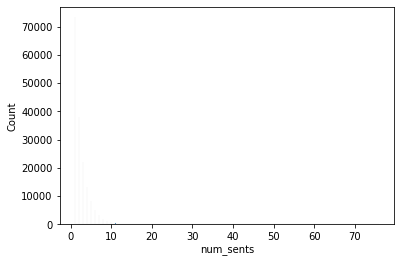

In [134]:
sns.histplot(data=rvw_df, x='num_sents')

In [139]:
rvw_df['num_sents'].value_counts(sort=False)

1     73280
2     38000
3     22111
4     13354
5      8350
6      5085
7      3211
8      1913
9      1198
10      691
11      484
12      307
13      224
14      158
15      125
16      107
17       54
18       56
19       54
20       34
21       38
22       26
23       29
24       24
25       17
26       16
27       15
28       11
29        9
30        6
31        8
32        3
33        2
34        9
35        2
36        3
37        1
38        5
39        4
41        1
42        2
43        1
45        1
46        1
56        2
58        1
59        1
61        1
62        1
76        1
Name: num_sents, dtype: int64

In [151]:
rvw_df.loc[rvw_df['num_sents']==76]['review']

128708    I’m an over thinker. I get “analysis paralysis...
Name: review, dtype: object


In [155]:
rvw_df.loc[rvw_df['num_sents']==76]['review_doc'][128708]

I’m an over thinker. I get “analysis paralysis” - trying to figure out what’s “best” when making a decision... but stalling on actually doing it. So choosing to get counseling, much less acting on it - was a big deal. *Btw, that’s not why I was wanting counseling- I’m just being real here.  I’ve got all kinds of other fun things I wanted to address in my crazy world, that’s just a fun fact about myself that I’ve learned. :) 
So research:  I read tons of reviews on MANY different platforms, I googled the “best online counseling apps” too :) I called my doctors office for referrals... then once I chose BetterHelp, I second guessed spending the money - so I actually waited an extra week- knowing full well I’d blow that money on eating out or something dumb... when I really needed to take the time to take care of me and talk to someone.  
So the following week I stopped putting it off, and I jumped in, and signed up and it was EASY. I checked the boxes so they could match me and what exper

<AxesSubplot:xlabel='num_tokens', ylabel='Count'>

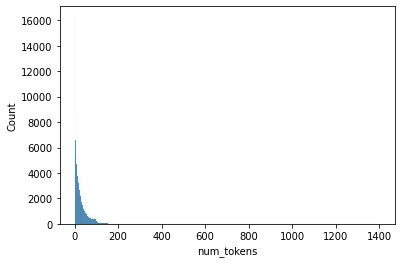

In [135]:
sns.histplot(data=rvw_df, x='num_tokens')

<AxesSubplot:xlabel='num_stopped_tokens', ylabel='Count'>

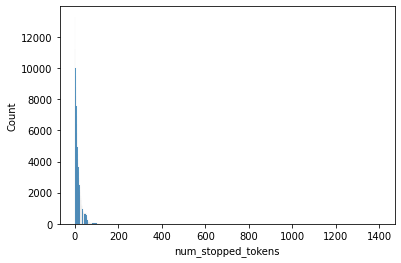

In [136]:
sns.histplot(data=rvw_df, x='num_stopped_tokens')